In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import axes
from PIL import Image
from skimage.segmentation import slic
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float
from skimage import io
import matplotlib.pyplot as plt
import argparse
from skimage.color import rgb2hsv
from skimage.morphology import convex_hull_image

In [125]:
def maxmod(p,th=5000):
  for i in range(len(p[0][:])):
    if p[0][-i]>th:
      max=p[1][-i]
      break
  return max
def cmask(mask):
  sel=0
  for i in mask.ravel():
    if i:
      sel=sel+1
  return sel
def ucut(img,f):
  cx=int(img.shape[0]/(f*2))
  cy=int(img.shape[1]/(f*2))
  return img[cx:(img.shape[0]-cx),cy:(img.shape[1]-cy)]

def Assem(img,cimg,f):
  m=np.full(img.shape, False)
  cx=int(img.shape[0]/(f*2))
  cy=int(img.shape[1]/(f*2))
  m[cx:img.shape[0]-cx,cy:img.shape[1]-cy]=cimg
  return m

In [101]:
def adapth(img,ith=0.8,f=3,maxiter=25,coe=0.035,step=0.01,w=0.04):

  hsv_i= rgb2hsv(img)
  med = cv2.blur(hsv_i,(25,25),0)
  val_img = med[:, :, 2]
  binary_img = np.logical_and((val_img > ith),((ith+w) > val_img))
  con=convex_hull_image(binary_img)

  print(ith)
  print(cmask(con)/(len(con.ravel())))
  if (cmask(con)/(len(con.ravel())))>coe:
    for i in range(maxiter):
      ith=ith+step
      print(ith)
      binary_img=np.logical_and((val_img > ith),((ith+w) > val_img))
      con=convex_hull_image(binary_img)
      print(cmask(con)/(len(con.ravel())))
      if ((cmask(con)/(len(con.ravel())))<coe)or(ith>=1):
        break
  return ith

In [136]:
def cadapth(img,ith=0.8,maxiter=25,coe=0.035,step=0.01,w=0.04,initial_cut=3.5):

  hsv_i= rgb2hsv(img)
  med = cv2.blur(hsv_i,(25,25),0)
  val_img = med[:, :, 2]
  cimg=ucut(val_img,initial_cut)
  binary_img = np.logical_and((cimg > ith),((ith+w) > cimg))
  m=Assem(val_img,binary_img,initial_cut)
  con=convex_hull_image(m)
  print(ith)
  print(cmask(con)/(len(con.ravel())))
  if (cmask(con)/(len(con.ravel())))>coe:
    for i in range(maxiter):
      ith=ith+step
      print(ith)
      binary_img=np.logical_and((cimg > ith),((ith+w) > cimg))
      m=Assem(val_img,binary_img,initial_cut)
      con=convex_hull_image(binary_img)
      print(cmask(con)/(len(val_img.ravel())))
      if ((cmask(con)/(len(val_img.ravel())))<coe)or(ith>=1):
        break
  return ith

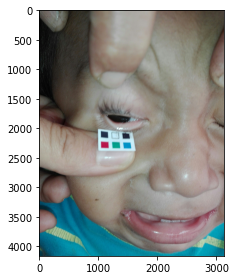

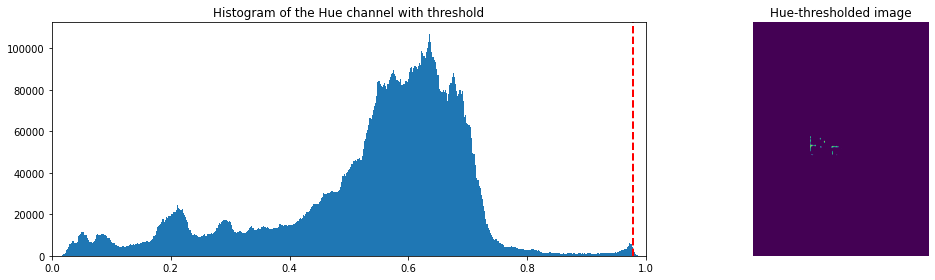

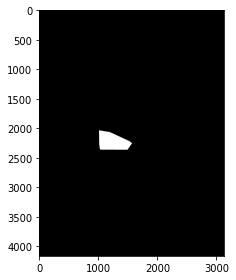

In [7]:
di='/content/drive/My Drive/CoLab/Pre-pro/c1anemia-121.jpg'
img = io.imread(di)
 
fig, ax0 = plt.subplots(ncols=1, figsize=(16, 4))
ax0.imshow(img)
plt.tight_layout()
plt.show()
 
hsv_i= rgb2hsv(img)
med = cv2.blur(hsv_i,(25,25),0)
hue_img = med[:, :, 0]
sat_img = med[:, :, 1]
val_img = med[:, :, 2]
 
#Threshold
th=maxmod(ax0.hist(val_img.ravel(), 512),4000)


binary_img = val_img > th
 
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(16, 4))
 
ax0.hist(val_img.ravel(), 512)
ax0.set_title("Histogram of the Hue channel with threshold")
ax0.axvline(x=th, color='r', linestyle='dashed', linewidth=2)
ax0.set_xbound(0, 1)
ax1.imshow(binary_img)
ax1.set_title("Hue-thresholded image")
ax1.axis('off')
 
plt.tight_layout()
plt.show()
 
con=convex_hull_image(binary_img)
fig, ax1 = plt.subplots(ncols=1, figsize=(16, 4))
ax1.imshow(con,cmap=plt.cm.gray)
plt.tight_layout()
plt.show()
#recorte adaptativo
#menor que adaptativo

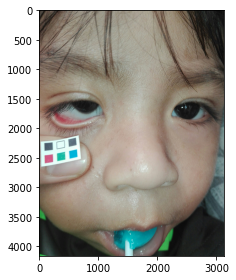

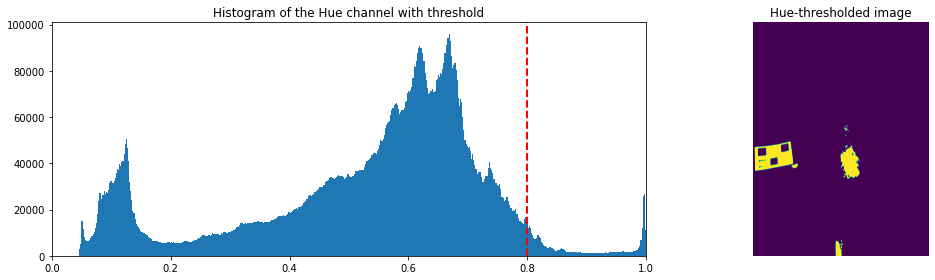

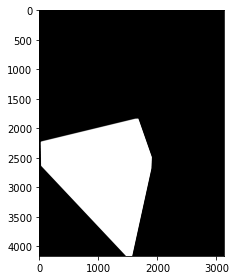

0.20161604721400395

In [162]:
di='/content/drive/My Drive/CoLab/Pre-pro/c1anemia-112.jpg'
img = io.imread(di)
 
fig, ax0 = plt.subplots(ncols=1, figsize=(16, 4))
ax0.imshow(img)
plt.tight_layout()
plt.show()
 
hsv_i= rgb2hsv(img)
med = cv2.blur(hsv_i,(25,25),0)
hue_img = med[:, :, 0]
sat_img = med[:, :, 1]
val_img = med[:, :, 2]
 
#Threshold
th=0.8

binary_img = val_img > th
 
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(16, 4))
 
ax0.hist(val_img.ravel(), 512)
ax0.set_title("Histogram of the Hue channel with threshold")
ax0.axvline(x=th, color='r', linestyle='dashed', linewidth=2)
ax0.set_xbound(0, 1)
ax1.imshow(binary_img)
ax1.set_title("Hue-thresholded image")
ax1.axis('off')
 
plt.tight_layout()
plt.show()
 
con=convex_hull_image(binary_img)
fig, ax1 = plt.subplots(ncols=1, figsize=(16, 4))
ax1.imshow(con,cmap=plt.cm.gray)
plt.tight_layout()
plt.show()
cmask(con)/(len(con.ravel()))

#recorte adaptativo
#menor que adaptativo

In [163]:
ith=cadapth(img,maxiter=1000,coe=0.05,step=0.001,initial_cut=2)

0.8
0.0466121948964497


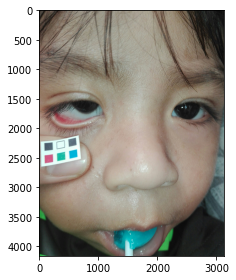

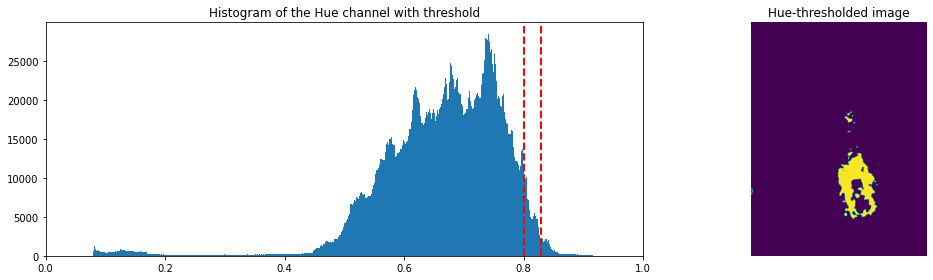

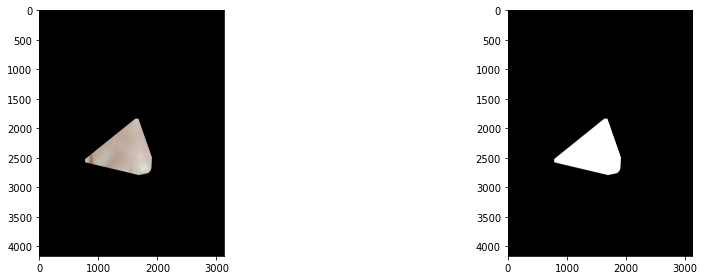

In [164]:
fig, ax0 = plt.subplots(ncols=1, figsize=(16, 4))
ax0.imshow(img)
plt.tight_layout()
plt.show()
 
hsv_i= rgb2hsv(img)
med = cv2.blur(hsv_i,(25,25),0)
hue_img = med[:, :, 0]
sat_img = med[:, :, 1]
val_img = med[:, :, 2]
val_img=ucut(val_img,2)
 
#Threshold
th=0.84
binary_img = np.logical_and((val_img > ith),((ith+0.03) > val_img))

 
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(16, 4))
 
ax0.hist(val_img.ravel(), 512)
ax0.set_title("Histogram of the Hue channel with threshold")
ax0.axvline(x=ith, color='r', linestyle='dashed', linewidth=2)
ax0.axvline(x=ith+0.03, color='r', linestyle='dashed', linewidth=2)
ax0.set_xbound(0, 1)
#ax0.set_ybound(0, 10)
ax1.imshow(binary_img)
ax1.set_title("Hue-thresholded image")
ax1.axis('off')
 
plt.tight_layout()
plt.show()
 
con=convex_hull_image(binary_img)
con=Assem(sat_img,con,2)
con3=np.zeros(img.shape)
con3[:,:,0]=con
con3[:,:,1]=con
con3[:,:,2]=con

ROI1=np.int_(img)*con3
ROI1=np.uint8(ROI1)

fig, (ax0,ax1) = plt.subplots(ncols=2, figsize=(16, 4))
ax0.imshow(ROI1)
ax1.imshow(con,cmap=plt.cm.gray)


plt.tight_layout()
plt.show()

In [43]:
r=np.random.rand(3,5)
C=np.array([[True,True,True,False,False],[False,True,False,False,False],[True,True,True,True,True]])
res=r*C
print(r)
print(C)
res

[[0.45122719 0.93422864 0.04750597 0.4364296  0.3909941 ]
 [0.89705853 0.11526561 0.75971972 0.61759084 0.89481413]
 [0.04473902 0.39947809 0.38936999 0.27328897 0.87232372]]
[[ True  True  True False False]
 [False  True False False False]
 [ True  True  True  True  True]]


array([[0.45122719, 0.93422864, 0.04750597, 0.        , 0.        ],
       [0.        , 0.11526561, 0.        , 0.        , 0.        ],
       [0.04473902, 0.39947809, 0.38936999, 0.27328897, 0.87232372]])

In [63]:
np.int_(img)

array([[[67, 69, 66],
        [66, 68, 65],
        [67, 67, 65],
        ...,
        [77, 57, 50],
        [78, 58, 51],
        [78, 58, 51]],

       [[72, 74, 71],
        [71, 73, 70],
        [71, 71, 69],
        ...,
        [77, 57, 50],
        [78, 58, 51],
        [79, 59, 52]],

       [[66, 68, 65],
        [66, 68, 65],
        [68, 68, 66],
        ...,
        [76, 56, 49],
        [77, 57, 50],
        [79, 59, 52]],

       ...,

       [[15, 15, 13],
        [14, 14, 12],
        [14, 14, 12],
        ...,
        [15, 12,  7],
        [14, 11,  6],
        [14, 11,  6]],

       [[17, 17, 15],
        [15, 15, 13],
        [14, 14, 12],
        ...,
        [14, 11,  6],
        [13, 10,  5],
        [12,  9,  4]],

       [[20, 20, 18],
        [16, 16, 14],
        [13, 13, 11],
        ...,
        [14, 11,  6],
        [12,  9,  4],
        [11,  8,  3]]])